### <font color="blue" size="7"> 
       Modelación usando Pyomo 
</font>

In [ ]:
!pip install pyomo

     |████████████████████████████████| 9.4MB 6.8MB/s 
     |████████████████████████████████| 256kB 48.1MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 163kB 50.6MB/s 


In [ ]:
import pandas as pd
import numpy as np 
# import pyomo.environ as pyo
# from pyomo.opt import SolverStatus,TerminationCondition
import os

In [ ]:
from time import strftime
a = "January"
current_month =
current_month

'Jan'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/"
data = pd.read_csv(path + "distances.csv", index_col=0)

In [ ]:
poblacion =  pd.read_csv(path + "poblacion.csv", index_col=0)
poblacion.head()

,Poblacion
municipio,
El contento,931
La hermosa,4390
Lejanías,4379
Cercanías,3357
El eco,4227


In [ ]:
poblacion["Poblacion"].to_dict()

{'Cardal': 3346,
 'Cercanías': 3357,
 'El contento': 931,
 'El eco': 4227,
 'El filo': 1926,
 'La hermosa': 4390,
 'Lejanías': 4379,
 'Lirio': 459,
 'Maguey': 4300,
 'Planadas': 2453}

In [ ]:
data.head()

,SJD,LM,SA,SR,SG,SF,EC,SFA
El contento,8.3,62.9,62.9,61.4,62.8,31.3,54.2,10.5
La hermosa,8.3,47.0,62.9,53.8,79.4,72.7,79.5,64.0
Lejanías,25.3,5.9,67.1,63.3,2.8,70.9,58.3,72.0
Cercanías,74.4,63.9,69.8,51.3,62.9,7.0,17.2,13.8
El eco,63.6,69.9,20.4,56.0,50.6,76.2,27.2,63.5


In [ ]:
data.loc["Lejanías", :].min()

2.8

In [ ]:
model = pyo.ConcreteModel()

# Conjuntos
model.M = pyo.Set(initialize=data.index, ordered=True, 
                  doc="Conjunto de hospitales")
model.H = pyo.Set(initialize=data.columns, ordered=True, 
                  doc="Conjunto de hospitales")

In [ ]:
# Parámetros
distances = {(k1, k2): data.loc[k1, k2] for k1 in data.index for k2 in data.columns}
model.d = pyo.Param(model.M, model.H, initialize=distances, doc="Distancias")

model.delta_max = pyo.Param(initialize=5, mutable=True, doc="Número máximo de hospitales")
model.delta_min = pyo.Param(initialize=1, mutable=True, doc="Número máximo de hospitales")

model.pob = pyo.Param(model.M, initialize=poblacion["Poblacion"].to_dict(),
                      doc="Población")

In [ ]:
# Variables
model.y = pyo.Var(model.M, model.H, domain=pyo.Binary, 
                  doc="Pertenencia de un municipio a un hospital")
model.x = pyo.Var(model.H, domain=pyo.Binary, 
                  doc="Cantidad de hospitales asignados")
model.dmax = pyo.Var(domain=pyo.PositiveReals)


In [ ]:
# Función objetivo

def obj_func(model):
    pyo.expr = sum(sum(model.d[i, j]*model.y[i, j] for i in model.M) for j in model.H)/len(model.M)
    return pyo.expr
model.dist_prom = pyo.Objective(rule=obj_func, sense=pyo.minimize, 
                                doc="Minimizar las distancias promedios")
model.dist_prom.activate()

def obj_func2(model):
    pyo.expr = model.dmax
    return pyo.expr
model.dist_max = pyo.Objective(rule=obj_func2, sense=pyo.minimize, 
                           doc="Restricción de distancia máxima")
model.dist_max.deactivate()

In [ ]:
# Restricciones

def rest1(model):
    return sum(model.x[j] for j in model.H) <= model.delta_max
model.r1 = pyo.Constraint(rule=rest1, doc="Cantidad de hospitales permitida máxima")

def rest4(model):
    return sum(model.x[j] for j in model.H) >= model.delta_min
model.r4 = pyo.Constraint(rule=rest4, doc="Cantidad de hospitales permitida ḿinima")

def rest2(model, i):
    return sum(model.y[i, j] for j in model.H) == 1
model.r2 = pyo.Constraint(model.M, rule=rest2, 
                          doc="Pertenencia de un municipio a un solo hospital")

def rest3(model, i, j):
    return model.d[i, j]*model.y[i, j] <= model.dmax
model.r3 = pyo.Constraint(model.M, model.H, 
                          rule=rest3, doc="Restricción de distancia mínima")

def rest5(model, m, h):
  return model.y[m,h] <= model.x[h]
model.r5 = pyo.Constraint(model.M, model.H, rule=rest5, 
                          doc="Que en realidad el hospital habilitado si sea uno que tiene un municipio asignado")

In [ ]:
# instal cbc
!apt-get install -y -qq coinor-cbc

Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unpack .../4-coinor-libcbc3_2.9.9+repack1-1_amd64.deb ...
Unpacking coinor-libcbc3 (2.9.9+repack1-1) ...
Selecting p

In [ ]:
opt = pyo.SolverFactory("cbc", executable='/usr/bin/cbc')
results = opt.solve(model)  
model.display()

    'pyomo.core.base.param.SimpleParam'>) on block unknown with a new
    Component (type=<class 'pyomo.core.base.param.SimpleParam'>). This is
    usually indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    model=unknown;
        message from solver=<undefined>


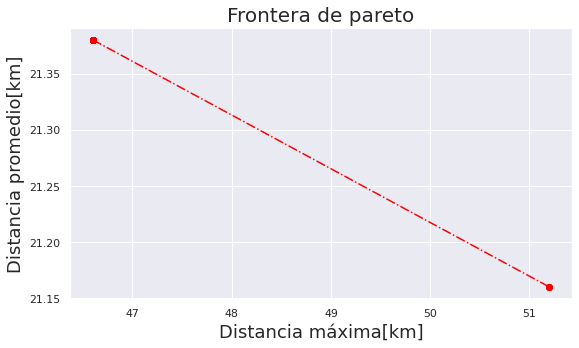

In [ ]:
# Aplicamos epsilon restricciones para encontrar la curva de pareto

n = 5
f2_min = 46.6
f2_max = 51.2

step = int((f2_max - f2_min)/ n)
steps = list(range(int(f2_min),int(f2_max),step)) + [f2_max]
steps

model.e = pyo.Param(initialize=46.6, mutable=True)
def r(model):
    pyo.expr = model.dmax <= model.e
    return pyo.expr
model.C_epsilon = pyo.Constraint(rule=r)

opt = pyo.SolverFactory("cbc", executable='/usr/bin/cbc')
results = opt.solve(model) 


x1_l = []
x2_l = []
for i in steps:
    getattr(model, 'e')[None] = i
    opt.solve(model) 
    x1_l.append(pyo.value(model.dmax))
    x2_l.append(pyo.value(model.dist_prom))

plt.figure(figsize=(9,5))
plt.title('Frontera de pareto', fontsize=20);
plt.ylabel("Distancia promedio[km]", fontdict={"size":18})
plt.xlabel("Distancia máxima[km]", fontdict={"size":18})
plt.plot(x1_l, x2_l, 'o-.', color="red")
plt.scatter(x1_l, x2_l, color="black")
plt.grid(True);

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Gráfica para ir mostrando los cambios en la distancia máximo con los hospitales.
# (figura 5)
dis = []
dmax = []
for i in range(1, 9):
    getattr(model, 'delta_max')[None] = i
    opt.solve(model)  
    dis.append(round(model.objective2.expr(), 2))
    dmax.append(pyo.value(model.dmax))


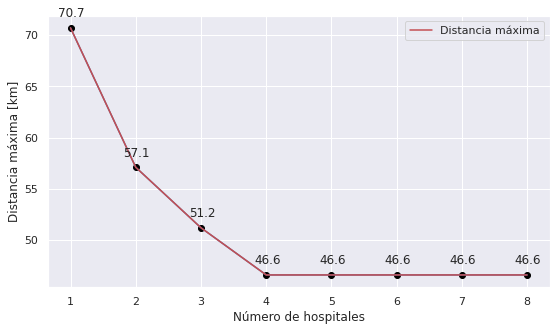

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(list(range(1,9)), dis)
plt.scatter(list(range(1,9)), dis, color="black")
plt.plot(list(range(1,9)), dmax, color="r", label="Distancia máxima")
plt.ylabel("Distancia máxima [km]")
plt.xlabel("Número de hospitales")
plt.legend(loc="best")
plt.title("")

for x,y in zip(list(range(1,9)),dis):
    label = f"{y}"
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(1,11), # distance from text to points (x,y)
                 ha='center') 
plt.show()

In [ ]:
560 + 1240 + 170 + 207 + 400*2 + 250 + 250 + 400

3877

In [ ]:
dem = 3600 

